# Stress Detection with Machine Learning
Stress, anxiety, and depression are threatening the mental health of people. Every person has a reason for having a stressful life. People often share their feelings on social media platforms like on Instagram in the form of posts and stories, and on Reddit in the form of asking for suggestions about their life on subreddits. In the past few years, many content creators have come forward to create content to help people with their mental health. Many organizations can use stress detection to find which social media users are stressed to help them quickly.

## Stress Detection with Machine Learning
Stress detection is a challenging task, as there are so many words that can be used by people on their posts that can show whether a person is having psychological stress or not.

## Stress Detection using Python

In [19]:
import pandas as pd
import numpy as np

import nltk
import re
from nltk.corpus import stopwords
import string

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/stress.csv")
data.tail()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722
2837,ptsd,5y25cl,"[0, 5]",I was talking to my mom this morning and she s...,961,1,0.571429,1488909516,2,0.835254,...,1.0000,1.0000,1.0,1.68891,1.44615,1.89707,0.76,2,2.412000,0.016667


In [3]:
# check null values
data.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [6]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/rin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [8]:
data["text"] = data["text"].apply(clean)

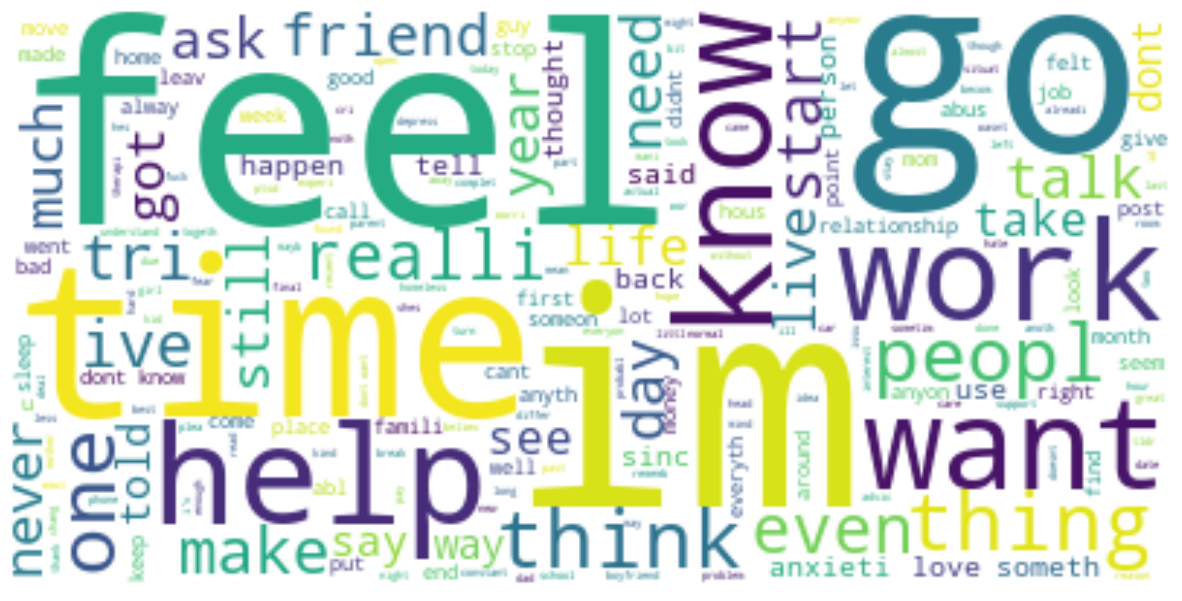

In [10]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Stress Detection Model
The label column in this dataset contains labels as 0 and 1. 0 means no stress, and 1 means stress. I will use Stress and No stress labels instead of 1 and 0. So let’s prepare this column accordingly and select the text and label columns for the process of training a machine learning model:

In [11]:
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})
data = data[["text", "label"]]

data.tail()

,text,label
2833,week ago precious ignor jan happi year prec...,No Stress
2834,dont abil cope anymor im tri lot thing trigger...,Stress
2835,case first time your read post look peopl will...,No Stress
2836,find normal good relationship main problem see...,No Stress
2837,talk mom morn said sister trauma wors mine did...,Stress


In [13]:
X = data.text.to_numpy()
y = data.label.to_numpy()

In [14]:
cv = CountVectorizer()

In [15]:
X = cv.fit_transform(X)
X

<2838x7842 sparse matrix of type '<class 'numpy.int64'>'
	with 98832 stored elements in Compressed Sparse Row format>

In [17]:
X.data, X.shape

(array([1, 1, 1, ..., 1, 1, 1]), (2838, 7842))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [21]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
model.predict(data)

Enter a Text:  People need to take care of their mental health


array(['No Stress'], dtype='<U9')

In [22]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
model.predict(data)

Enter a Text:  Sometime I feel like I need some help


array(['Stress'], dtype='<U9')

So as you can see, we can see good results from our machine learning model. This is how you can train a stress detection model to detect stress from social media posts. This machine learning model can be improved by feeding it with more data.